In [4]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('archive.zip',compression='zip')

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df.shape

(800, 13)

In [8]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [10]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [12]:
df.drop(columns='#', inplace=True)
df.drop(columns='Name', inplace=True)
df.drop(columns='Type 2', inplace=True)

In [13]:
encoder = LabelEncoder()
df['Type 1'] = encoder.fit_transform(df['Type 1'])
df['Legendary'] = encoder.fit_transform(df['Legendary'])

In [14]:
df.corr()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,1.000000,0.023251,0.094230,-0.037525,0.103439,-0.006694,0.018911,-0.066471,-0.101129,-0.010162
Total,0.023251,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.094230,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,-0.037525,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.103439,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,-0.006694,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.018911,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,-0.066471,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,-0.101129,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,-0.010162,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<BarContainer object of 800 artists>

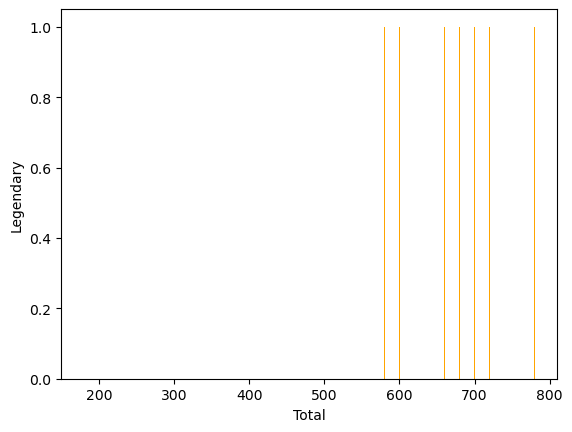

In [15]:
plt.xlabel('Total')
plt.ylabel('Legendary')
plt.bar(df['Total'],df['Legendary'], color = 'orange')

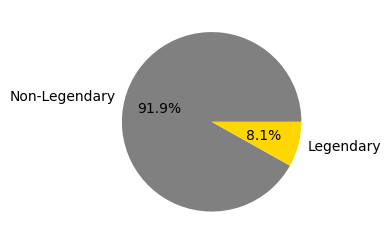

In [16]:
plt.subplot(1, 2, 2)
plt.pie(df['Legendary'].value_counts(), labels=['Non-Legendary', 'Legendary'], autopct='%1.1f%%', colors=['gray', 'gold'])

plt.tight_layout()
plt.show()

In [87]:
X = df.drop('Legendary', axis = 1)
Y = df['Legendary']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X, Y)

for idx, (column_name, coef) in enumerate(zip(X.columns, lasso_model.coef_)):
    print(f"Feature {column_name}: Coefficient = {coef}")

Feature Type 1: Coefficient = -0.00012906450986292374
Feature Total: Coefficient = 0.0009877569414817949
Feature HP: Coefficient = -0.0004750823405455861
Feature Attack: Coefficient = -0.0
Feature Defense: Coefficient = -0.00045729354913683166
Feature Sp. Atk: Coefficient = 0.0010792242518359548
Feature Sp. Def: Coefficient = 0.00023864927535802662
Feature Speed: Coefficient = 0.00018147599413245895
Feature Generation: Coefficient = 0.009251085443894145


In [19]:
df.drop(columns='Attack', inplace=True)

In [20]:
Scaler = StandardScaler()
df[['Type 1']] = Scaler.fit_transform(df[['Type 1']])
df[['Total']] = Scaler.fit_transform(df[['Total']])
df[['HP']] = Scaler.fit_transform(df[['HP']])
df[['Defense']] = Scaler.fit_transform(df[['Defense']])
df[['Sp. Atk']] = Scaler.fit_transform(df[['Sp. Atk']])
df[['Sp. Def']] = Scaler.fit_transform(df[['Sp. Def']])
df[['Speed']] = Scaler.fit_transform(df[['Speed']])

In [21]:
df.head()

,Type 1,Total,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.083828,-0.976765,-0.950626,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,-0.083828,-0.251088,-0.362822,-0.347917,0.219560,0.291156,-0.285015,1,0
2,-0.083828,0.749845,0.420917,0.293849,0.831146,1.010283,0.403635,1,0
3,-0.083828,1.583957,0.420917,1.577381,1.503891,1.729409,0.403635,1,0
4,-0.621765,-1.051836,-1.185748,-0.989683,-0.392027,-0.787533,-0.112853,1,0


In [22]:
#Support Vector Machine (SVM)
>>> from sklearn.svm import SVC
>>> svc = SVC(kernel='linear')
>>> svc.fit(X_train, Y_train)
>>> print({svc.score(X_test, Y_test)})
SVM = svc.score(X_test, Y_test)

{0.925}


In [23]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print({gnb.score(X_test, Y_test)})
GNB = gnb.score(X_test, Y_test)

{0.9125}


In [24]:
#K-Nearest Neighbors (KNN)
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print({knn.score(X_test, Y_test)})
KNN = knn.score(X_test, Y_test)

{0.91875}


In [25]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, Y_train)
print({dtc.score(X_test, Y_test)})
DTC = dtc.score(X_test, Y_test)

{0.93125}


In [26]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
print({rfc.score(X_test, Y_test)})
RFC = rfc.score(X_test, Y_test)

{0.9625}


In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#TOTAL NO. of ITERATIONS REACHED LIMIT
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase max_iter here
logreg.fit(X_train, Y_train)
print({logreg.score(X_test, Y_test)})
LR = logreg.score(X_test, Y_test)

{0.91875}


In [28]:
#Support Vector Machine (SVM) - RBF Kernel
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, Y_train)
print({svc.score(X_test, Y_test)})
SVM_RBF = svc.score(X_test, Y_test)

{0.925}


In [29]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gbc.fit(X_train, Y_train)
print({gbc.score(X_test, Y_test)})
GBC = gbc.score(X_test, Y_test)

{0.95}


In [30]:
#K-Nearest Neighbors (KNN) - Cosine Distance
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print({knn.score(X_test, Y_test)})
KNN_CD = knn.score(X_test, Y_test)

{0.91875}


In [31]:
#Support Vector Machine (SVM) - Multi-class
from sklearn.svm import SVC

svc = SVC(kernel='linear', decision_function_shape='ovr')
svc.fit(X_train, Y_train)

print({svc.score(X_test, Y_test)})
SVM_MC = svc.score(X_test, Y_test)

{0.925}


In [32]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
print({mnb.score(X_test, Y_test)})
MNB = mnb.score(X_test, Y_test)

{0.7375}


In [33]:
#Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print({lda.score(X_test, Y_test)})
LDA = lda.score(X_test, Y_test)

{0.93125}


In [34]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50)
abc.fit(X_train, Y_train)
print({abc.score(X_test, Y_test)})
AC = abc.score(X_test, Y_test)

{0.94375}


In [35]:
#PoissonRegressor (Not Ideal)
import numpy as np
from sklearn.linear_model import PoissonRegressor

model = PoissonRegressor(max_iter=1000)
model.fit(X_train, Y_train)
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
print(accuracy_score(Y_test, y_pred))
PR_NI = accuracy_score(Y_test, y_pred)

0.925


In [36]:
#RidgeClassifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha=1.0)
ridge.fit(X_train, Y_train)
print(ridge.score(X_test, Y_test))
RC = ridge.score(X_test, Y_test)

0.925


In [37]:
#Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, Y_train)
print(perceptron.score(X_test, Y_test))
P = perceptron.score(X_test, Y_test)

0.88125


In [38]:
model_names = ["Support Vector Machine (SVM)", "Gaussian Naive Bayes", "K-Nearest Neighbors (KNN)", "Decision Tree Classifier", "Random Forest Classifier", "Logistic Regression", "Support Vector Machine (SVM) - RBF Kernel", "Gradient Boosting Classifier", "K-Nearest Neighbors (KNN) - Cosine Distance", "Support Vector Machine (SVM) - Multi-class", "Multinomial Naive Bayes", "Linear Discriminant Analysis (LDA)", "AdaBoost Classifier", "PoissonRegressor (Not Ideal)", "RidgeClassifier", "Perceptron"]
accuracies = [SVM, GNB, KNN, DTC, RFC, LR, SVM_RBF, GBC, KNN_CD, SVM_MC, MNB, LDA, AC, PR_NI, RC, P]
for i in range(len(accuracies)):
    accuracies[i]*=100

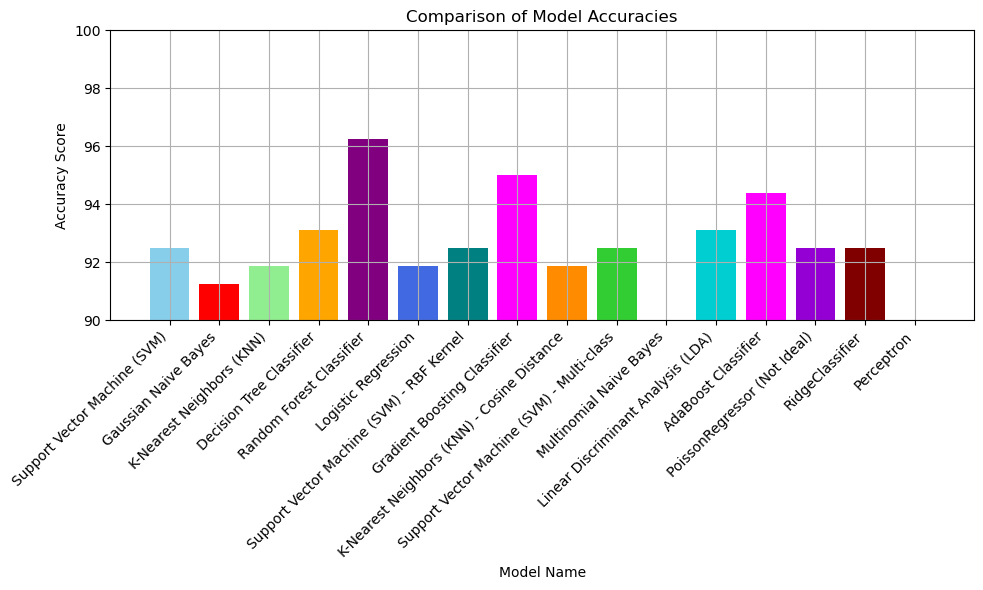

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, 
color = (
    'skyblue', 'red', 'lightgreen', 'orange', 'purple', 'royalblue', 'teal',
    'magenta', 'darkorange', 'limegreen', 'darkgoldenrod', 'darkturquoise',
    'fuchsia', 'darkviolet', 'maroon', 'coral', 'navy', 'silver', 'gold'
))
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(90,100)
plt.grid()
plt.show()


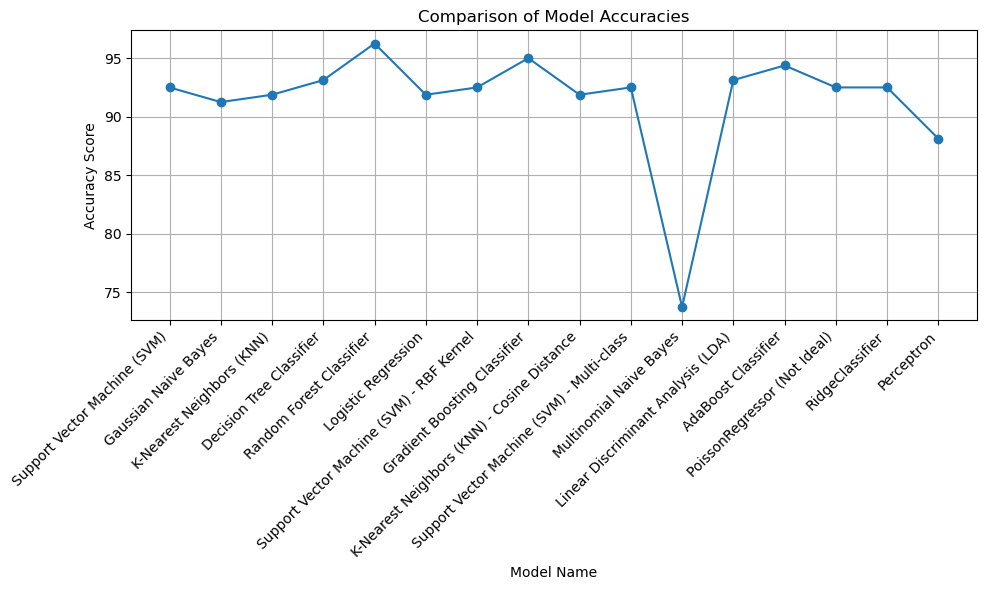

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(model_names, accuracies, marker='o', linestyle='-', )
plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")

plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
>>> print(confusion_matrix(Y_test, y_pred))

[[148   0]
 [ 12   0]]


In [42]:
>>> from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X_test, Y_test, cv=4))
# no overfiting

[0.9   1.    0.825 0.925]


In [43]:
>>> from sklearn.model_selection import GridSearchCV
>>> params = {"n_neighbors": np.arange(1,3), "metric": ["euclidean", "cityblock"]}
>>> grid = GridSearchCV(estimator=knn, param_grid=params)
>>> grid.fit(X_train, Y_train)
>>> print(grid.best_score_)
>>> print(grid.best_estimator_.n_neighbors)

0.95625
1


[Documentation]

Purpose: to predict whether a Pokemon is legendary or not. It performs various data cleaning, exploration, pre-processing, training, evaluation, and visualization steps.

[Libraries Used:]

pandas (pd)
matplotlib.pyplot (plt)
scikit-learn (various modules)

[Data Loading and Cleaning:]

- Data Loading: 
Reads the compressed archive "archive.zip" using pd.read_csv.

- Data Exploration:
Uses various pandas methods to get an initial understanding of the data:
df.head(): Displays the first few rows.
df.shape: Shows the data dimensions.
df.isna().sum(), df.isnull().sum(): Checks for missing values.
df.describe(): Provides summary statistics for numerical features.
df.info(): Shows data types and non-null values for each column.
Feature Selection: Drops columns '#' (index), 'Name', and 'Type 2' as they have 386 NAN.

- Label Encoding:
Transforms categorical features 'Type 1' and 'Legendary' into numerical labels using LabelEncoder for modeling purposes.

[Data Visualization:]

- Correlation Matrix:
df.corr() creates a correlation matrix to explore relationships between features.

- Bar Plot:
A bar chart is generated using plt to visualize the relationship between 'Total' and 'Legendary'.
Pie Chart: A pie chart is created using plt to show the distribution of legendary and non-legendary Pokemon.
Data Preprocessing:

- Splitting:
Splits the data into training and testing sets using train_test_split (80% training, 20% testing) for model evaluation.
Feature Scaling (Normalization): Applies StandardScaler to numerical features to standardize them to a normal distribution (mean 0, standard deviation 1). This can improve the performance of some machine learning algorithms.
Model Training and Evaluation:

- LASSO Regression:
A Lasso model is trained with an alpha of 0.001 (lasso_model.fit(X, Y)) to identify potentially important features based on their coefficients. The code iterates through features and prints their corresponding coefficients.

- Feature Dropping:
The 'Attack' feature Bec. Coefficient = -0.0 by using lasso_model

- Multiple Classifiers: 
Trains and evaluates various classification algorithms on the test set, including:

* Support Vector Machine (SVM) with linear and RBF kernels
* Gaussian Naive Bayes (GNB)
* K-Nearest Neighbors (KNN) with Euclidean and cosine distance
* Decision Tree Classifier
* Random Forest Classifier
* Logistic Regression
* Gradient Boosting Classifier
* Multinomial Naive Bayes (MNB)
* Linear Discriminant Analysis (LDA)
* AdaBoost Classifier
* PoissonRegressor (not ideal for classification)
* Ridge Classifier
* Perceptron

Each model's accuracy on the test set is evaluated using model.score(X_test, Y_test). The results are stored in variables like SVM, GNB, etc.

- Model Comparison:
Bar Plot, Line Plot (Optional), Box Plot (Optional): Creates different visualizations (bar chart, line plot, box plot) using plt to compare the accuracy scores of all models.

- Additional Analysis:
The code includes commented-out sections for confusion matrix calculation (confusion_matrix) and GridSearchCV for hyperparameter tuning (GridSearchCV). These can be uncommented for further analysis.